In [65]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
loaded_model = load_model("trained_model.h5")

In [87]:
import numpy as np
X_new_padded = np.load("my_array.npy")
data = np.load("data.npy")

In [67]:
import joblib
scaler = joblib.load('scaler.pkl')

In [68]:
X_new_padded

array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.04451626]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.04451626],
        [0.06954849]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.04451626],
        [0.06954849],
        [0.06701469]],

       ...,

       [[0.        ],
        [0.        ],
        [0.04451626],
        ...,
        [0.32869527],
        [0.42214021],
        [0.48764772]],

       [[0.        ],
        [0.04451626],
        [0.06954849],
        ...,
        [0.42214021],
        [0.48764772],
        [0.4272515 ]],

       [[0.04451626],
        [0.06954849],
        [0.06701469],
        ...,
        [0.48764772],
        [0.4272515 ],
        [0.37509011]]])

In [69]:
X_new_padded[1007].shape
X_trial = np.expand_dims(X_new_padded[1007],axis=0)
print(X_trial.shape)

(1, 1008, 1)


In [70]:

see = loaded_model.predict(X_trial)
print(see)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
[[0.40002155]]


In [71]:
len(see)

1

In [72]:
y_pred = scaler.inverse_transform(see)

In [73]:
y_pred

array([[417.01385]], dtype=float32)

In [74]:
X_new_padded[1007].shape

(1008, 1)

In [75]:
predictions = []
temp = X_trial
for i in range(0,15):
    y_pred = loaded_model.predict(temp)
    predictions.append(y_pred[0][0])
    temp[0] = (np.append(temp[0][1:], y_pred[0][0])).reshape(1008,1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [76]:
predictions = np.array(predictions)
print(predictions.shape)

(15,)


In [77]:
predictions

array([0.40002155, 0.38084525, 0.36724   , 0.3566649 , 0.34912783,
       0.34449872, 0.3423224 , 0.34196582, 0.3427661 , 0.34413323,
       0.34560692, 0.34687826, 0.34778443, 0.34828624, 0.34843543],
      dtype=float32)

In [78]:
predictions = scaler.inverse_transform(predictions.reshape(1,-1))
print(predictions)

[[417.01385 408.23474 402.00613 397.16473 393.7142  391.59497 390.5986
  390.43536 390.80173 391.42764 392.1023  392.68433 393.09918 393.32892
  393.39722]]


In [79]:
data = data.reshape(1009)

In [89]:
data = np.append(data, predictions[0])
data = data[700:]
print(data.shape)

(339,)


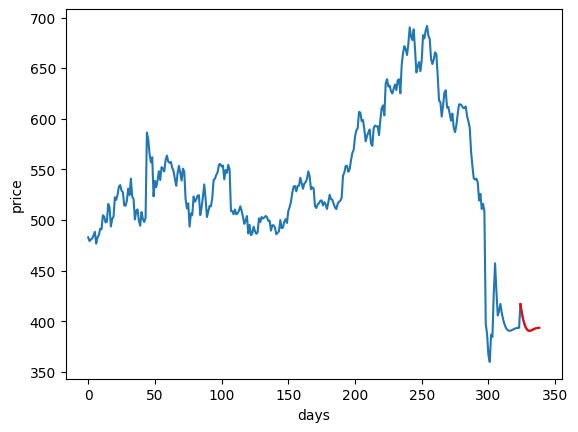

In [90]:
plt.plot(data)
plt.plot(range(len(data)-15, len(data)), data[-15:], color='red')
plt.xlabel('days')
plt.ylabel('price')
plt.show()